## Game of Thrones Descriptive Analysis

This notebook contains a descriptive analysis of Game of Thrones data. Including battle data and death data

In [7]:
# obtain data from kaggle
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [7]:
import kaggle

# Example to download a dataset:
!kaggle datasets download -d mylesoneill/game-of-thrones


Dataset URL: https://www.kaggle.com/datasets/mylesoneill/game-of-thrones
License(s): CC0-1.0


In [17]:
import zipfile
import os
import pandas as pd
import numpy as np

# Set the path to the zip file
zip_path = 'game-of-thrones.zip'

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('got_dataset')  # Extract into a folder called 'got_dataset'


In [19]:
os.listdir('got_dataset')

['battles.csv', 'character-deaths.csv', 'character-predictions.csv']

In [25]:
# Read data in df
battles = pd.read_csv('got_dataset/battles.csv')
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [29]:
# Examine dimensions of the dataset
rows, columns = battles.shape
print('Rows:', rows, 'Columns:', columns)

Rows: 38 Columns: 25


In [33]:
# Examine missing values
battles.isnull().sum()

name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
dtype: int64

In [39]:
# Rename attacker and defender columns
battles.rename(columns={'attacker_1':'primary_attacker'}, inplace = True)
battles.rename(columns={'defender_1':'primary_defender'}, inplace = True)
battles.head(5)

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [47]:
#Examine categorical values
battles['attacker_king'].value_counts()

attacker_king
Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: count, dtype: int64

In [49]:
battles['location'].value_counts()

location
Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore              

In [53]:
import seaborn as sns
from matplotlib import pyplot as plt

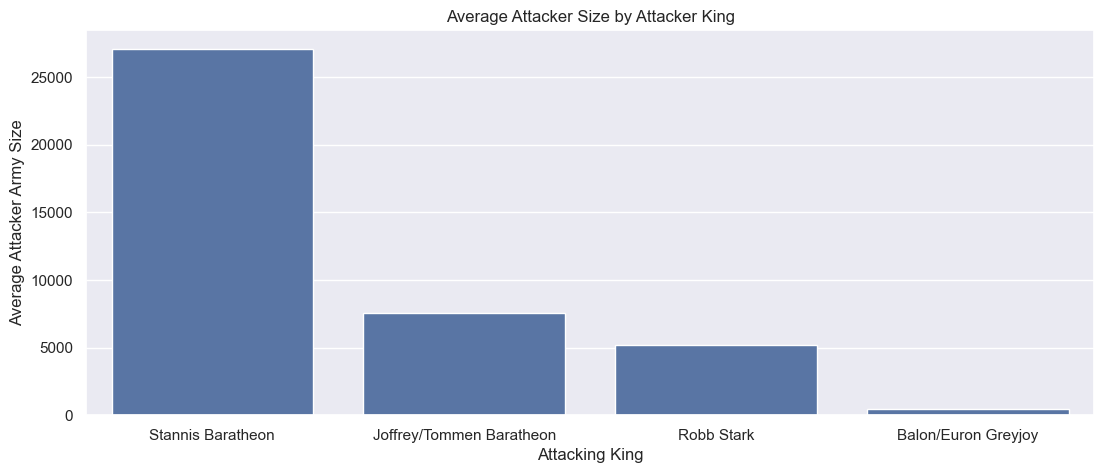

In [89]:
# Plot attacker size by attacker king
# order dataset so bars are in descending order
sorted_battles = battles.groupby('attacker_king')['attacker_size'].mean().sort_values(ascending=False)

sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x=sorted_battles.index,
            y=sorted_battles.values)
plt.title("Average Attacker Size by Attacker King")
plt.xlabel("Attacking King")
plt.ylabel("Average Attacker Army Size")
plt.show()

Stannis Baratheon has the largest average army size, followed by Joffrey, and Robb Stark. Balon has the smallest army size on average.

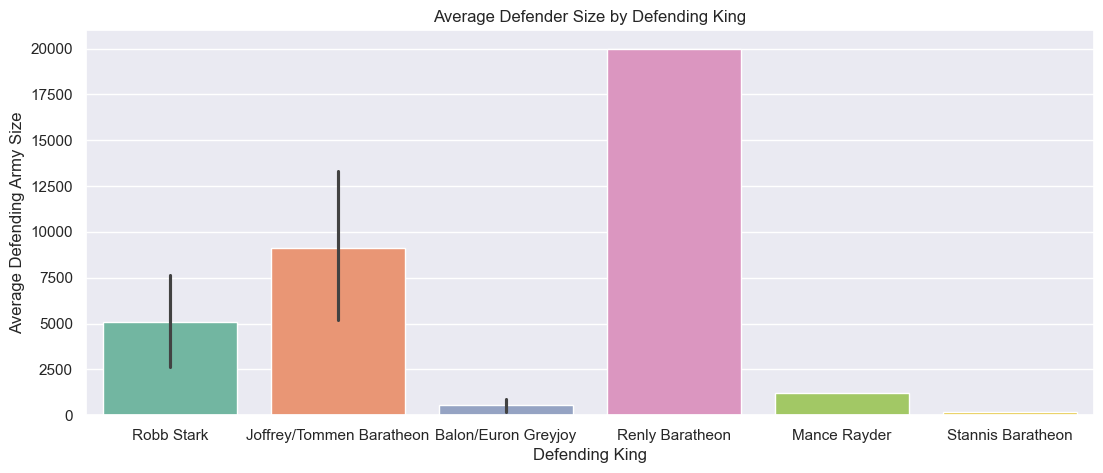

In [101]:
# Plot Defending king vs Defender size
sns.set(rc={'figure.figsize':(13,5)})
sns.barplot(x = 'defender_king',
            y = 'defender_size',
            hue = 'defender_king',
            data = battles,
            legend = False,
           palette = 'Set2')
plt.title('Average Defender Size by Defending King')
plt.xlabel('Defending King')
plt.ylabel('Average Defending Army Size')
plt.show()

When defending, Stannis Baratheon has the smallest army size on average. While Renly Baratheon has the largest defending army size on average.

In [103]:
#Examine the mean vs max
mean_defender = battles.groupby('defender_king')['defender_size'].mean()
print(mean_defender)
max_defender = battles.groupby('defender_king')['defender_size'].max()
print(max_defender)

defender_king
Balon/Euron Greyjoy           550.000000
Joffrey/Tommen Baratheon     9139.285714
Mance Rayder                 1240.000000
Renly Baratheon             20000.000000
Robb Stark                   5088.571429
Stannis Baratheon             200.000000
Name: defender_size, dtype: float64
defender_king
Balon/Euron Greyjoy           900.0
Joffrey/Tommen Baratheon    20000.0
Mance Rayder                 1240.0
Renly Baratheon             20000.0
Robb Stark                  10000.0
Stannis Baratheon             200.0
Name: defender_size, dtype: float64


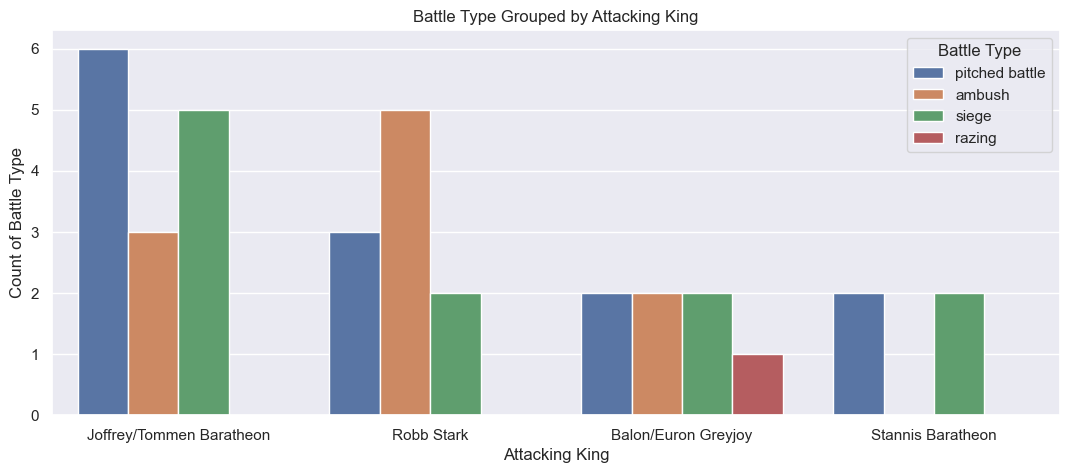

In [158]:
#Count bar graph of battle type
sns.countplot(x = battles['attacker_king'], hue = battles['battle_type'])
plt.title('Battle Type Grouped by Attacking King')
plt.xlabel('Attacking King')
plt.ylabel('Count of Battle Type')
plt.legend(title='Battle Type')
plt.show()

Joffrey has experienced the most battles overall, and the most pitched battles, and most sieges. Balon is the only King who has participated in all four types of battles.

In [120]:
# Load deaths dataset
deaths = pd.read_csv('got_dataset/character-deaths.csv')
deaths.head()                  

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),NaN,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [124]:
# Examine number of rows and columns
rows, columns = deaths.shape
print('Rows:', rows, 'Columns:', columns)

Rows: 917 Columns: 13


In [150]:
# Examine the frequency of Gender variable
print(deaths['Gender'].value_counts())
print(deaths['Gender'].value_counts(normalize=True)*100)

Gender
1    760
0    157
Name: count, dtype: int64
Gender
1    82.878953
0    17.121047
Name: proportion, dtype: float64


83% of the deaths were Male, while 17% were Female

In [156]:
# Examine frequency of Nobility variable
print(deaths['Nobility'].value_counts())
print(deaths['Nobility'].value_counts(normalize=True)*100)

Nobility
0    487
1    430
Name: count, dtype: int64
Nobility
0    53.107961
1    46.892039
Name: proportion, dtype: float64


47% of the deaths were not from nobility, while 53% of the deaths were.

In [162]:
deaths['Death Year'].value_counts()

Death Year
299.0    156
300.0    100
298.0     46
297.0      3
Name: count, dtype: int64

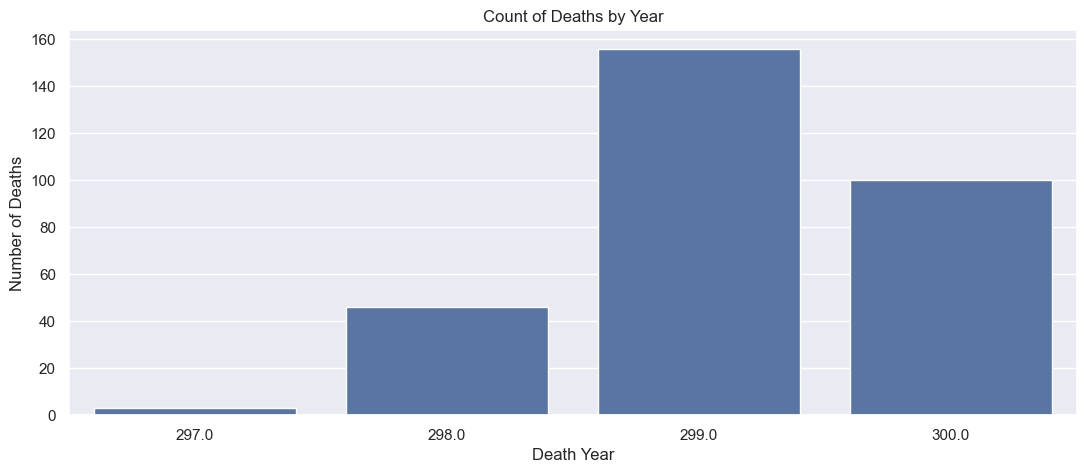

In [188]:
# Plot Deaths by year
sns.countplot(x = 'Death Year', data=deaths)
plt.title('Count of Deaths by Year')
plt.ylabel('Number of Deaths')
plt.show()

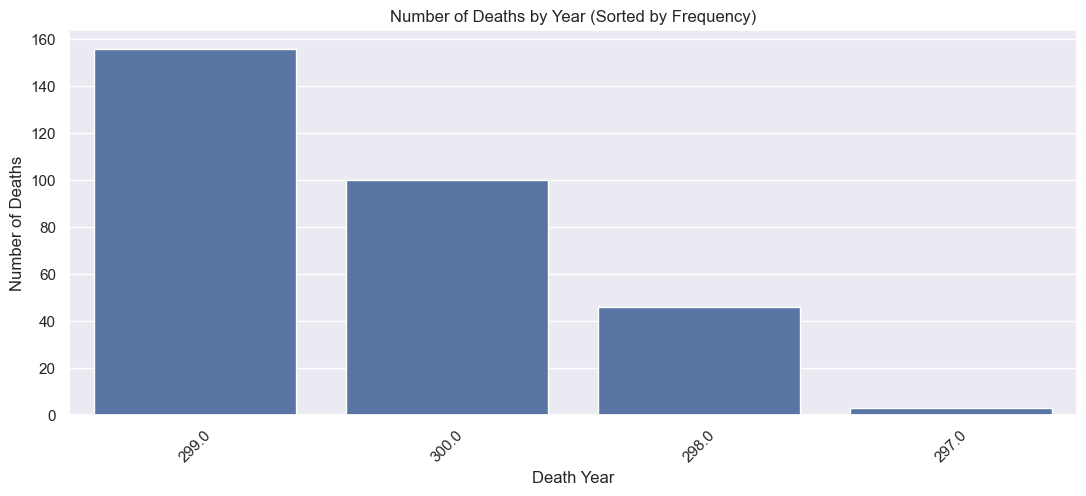

In [180]:
# Sort Death Years by frequency (most deaths to fewest deaths)
order = deaths['Death Year'].value_counts().index

sns.countplot(x='Death Year', data=deaths, order=order)
plt.title('Number of Deaths by Year (Sorted by Frequency)')
plt.xlabel('Death Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()


The year 299 has the most deaths.

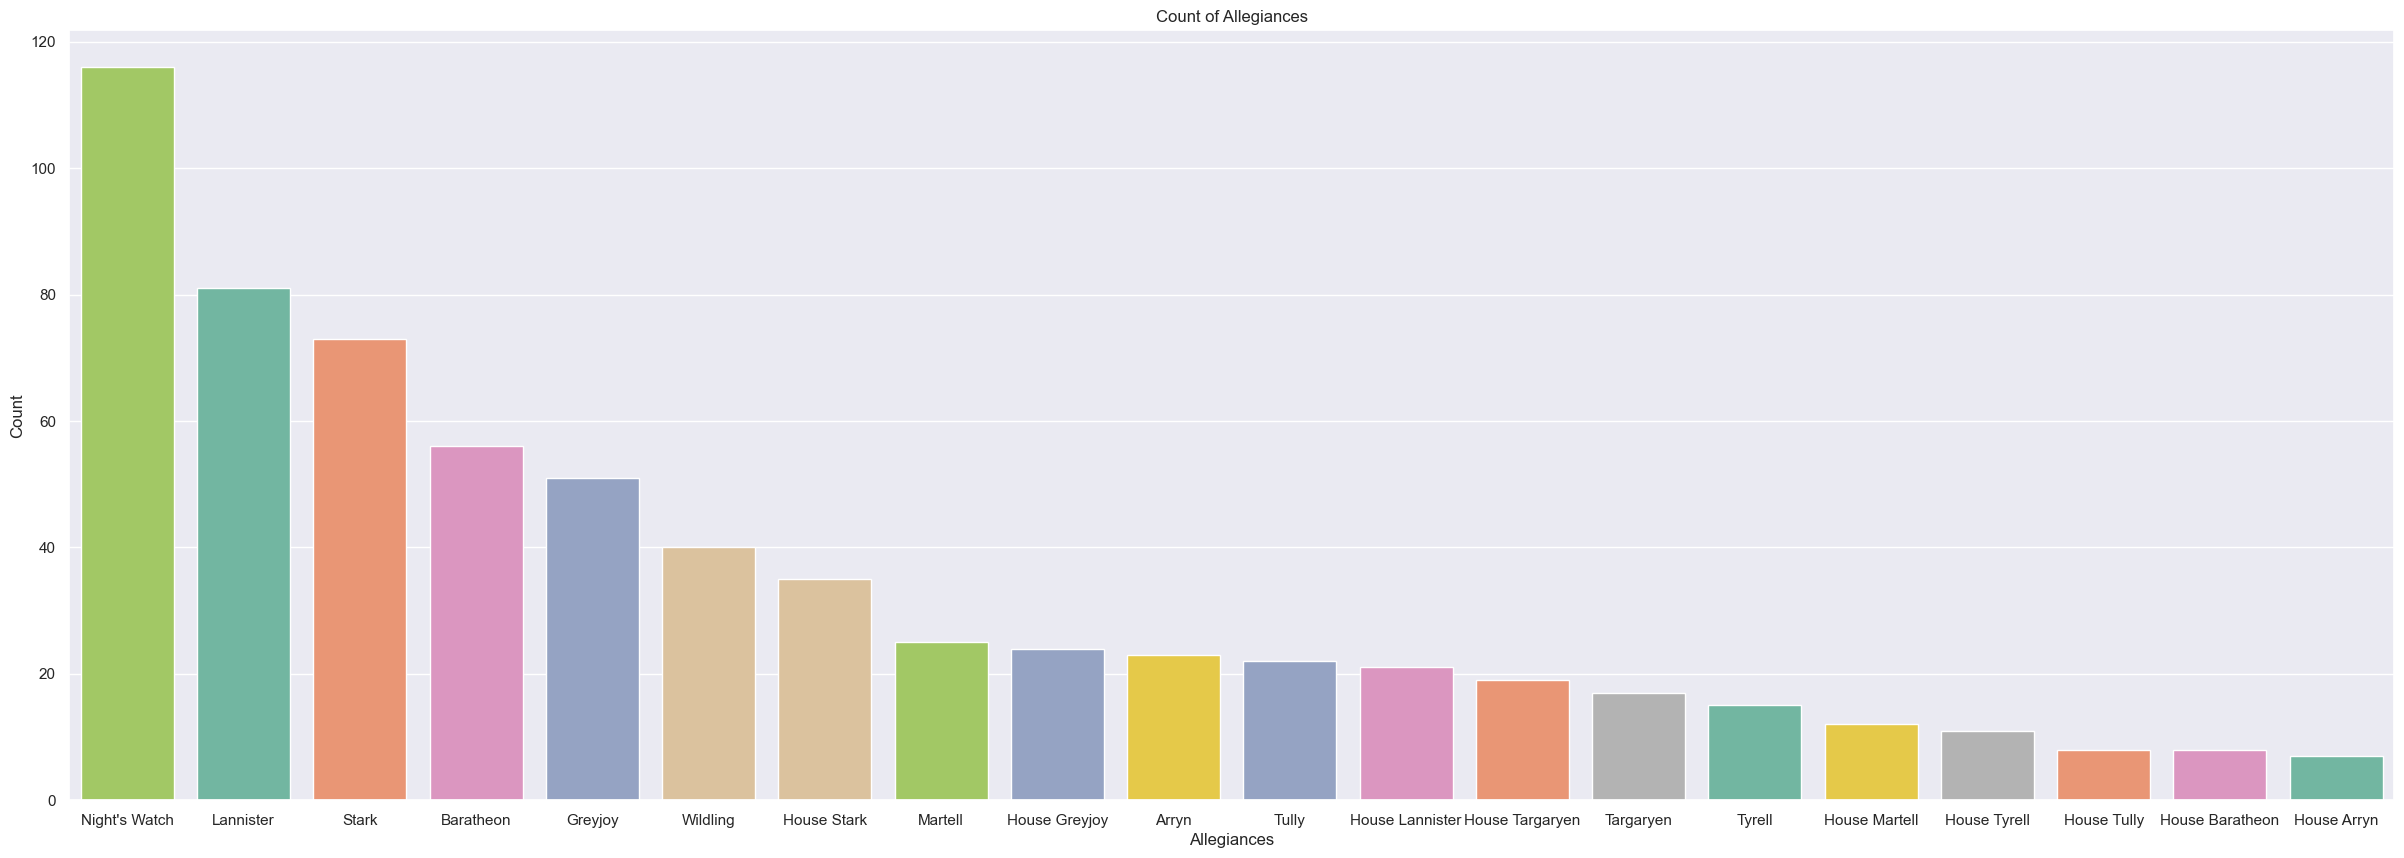

In [223]:
# Plot deaths by allegiance
ordered_allegiances = deaths['Allegiances'].value_counts().index

sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x = 'Allegiances', data = deaths,
              order=ordered_allegiances,
              hue='Allegiances',
              legend=False,
             palette='Set2')
plt.title('Count of Allegiances')
plt.ylabel('Count')
plt.show()

In [211]:
deaths['Allegiances'].value_counts(dropna=False)

Allegiances
NaN                253
Night's Watch      116
Lannister           81
Stark               73
Baratheon           56
Greyjoy             51
Wildling            40
House Stark         35
Martell             25
House Greyjoy       24
Arryn               23
Tully               22
House Lannister     21
House Targaryen     19
Targaryen           17
Tyrell              15
House Martell       12
House Tyrell        11
House Tully          8
House Baratheon      8
House Arryn          7
Name: count, dtype: int64

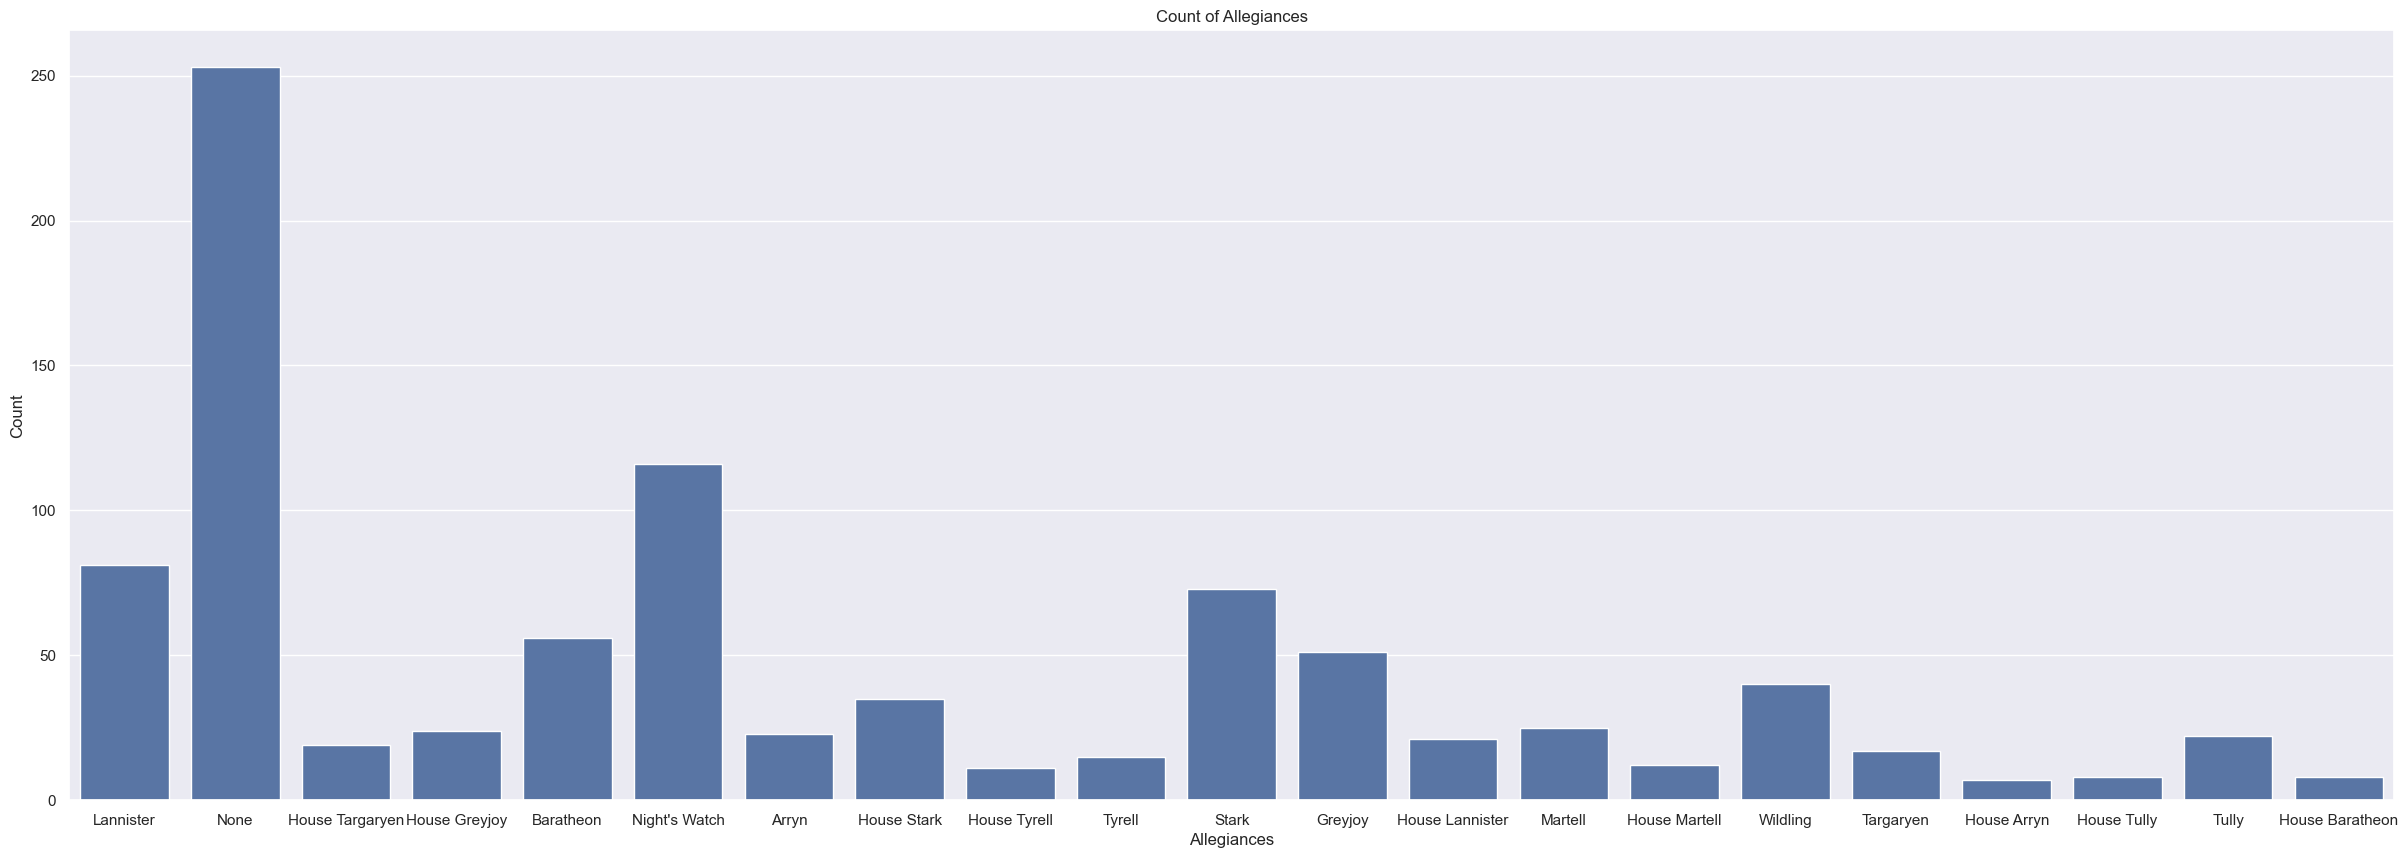

In [225]:
#Plot deaths including those with no allegiances
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x = deaths['Allegiances'].fillna('None'))
plt.title('Count of Allegiances')
plt.ylabel('Count')
plt.show()